In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import io
import pandas as pd


df2 = pd.read_csv('train.csv', usecols=[3,4,5])
df2.head()


,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
#ALSO GETTING QUORA STATISTICS
df=df2
numrows,numcols=df.shape
numrows*=2
sumlen=0
vocab=set()
num_duplicates=0
'''df['question1']=df['question1'].str.lower()
df['question1']=df['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['question1']=df['question1'].str.replace('[^\w\s]','')
df['question2']=df['question2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['question2']=df['question2'].str.replace('[^\w\s]','')
df['question2']=df['question2'].str.lower()'''
for idx, row in df.iterrows():
  q1=row["question1"]
  if(q1=="question1"):
    continue
  q2=row["question2"]
  #print(q1)
  #print(q2)
  if(int(float(row["is_duplicate"]))==1):
    num_duplicates+=1
  sumlen+=len(str(q1))
  sumlen+=len(str(q2))
  if("float" in str(type(q1)) or "float" in str(type(q2))):
    continue
  vocab.update(q1.split())
  vocab.update(q2.split())
print("Size of vocabulary:", len(vocab))  
print("Average sequence length: ", int(sumlen/numrows)) 
print("Number of duplicate questions: ", num_duplicates) 
print("Total number of question pairs: ", numrows)


Size of vocabulary: 232531
Average sequence length:  59
Number of duplicate questions:  149263
Total number of question pairs:  808580


In [0]:
import re

df2['question1_processed'] = df2['question1'].map(lambda x: re.sub('[,\.!?]|comments|answers|questions|question|answer|tags|comment|tag|post|community|ell', '', str(x)))
df2['question2_processed'] = df2['question2'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df2['question1_processed'] = df2['question1_processed'].map(lambda x: x.lower())
df2['question2_processed'] = df2['question2_processed'].map(lambda x: x.lower())

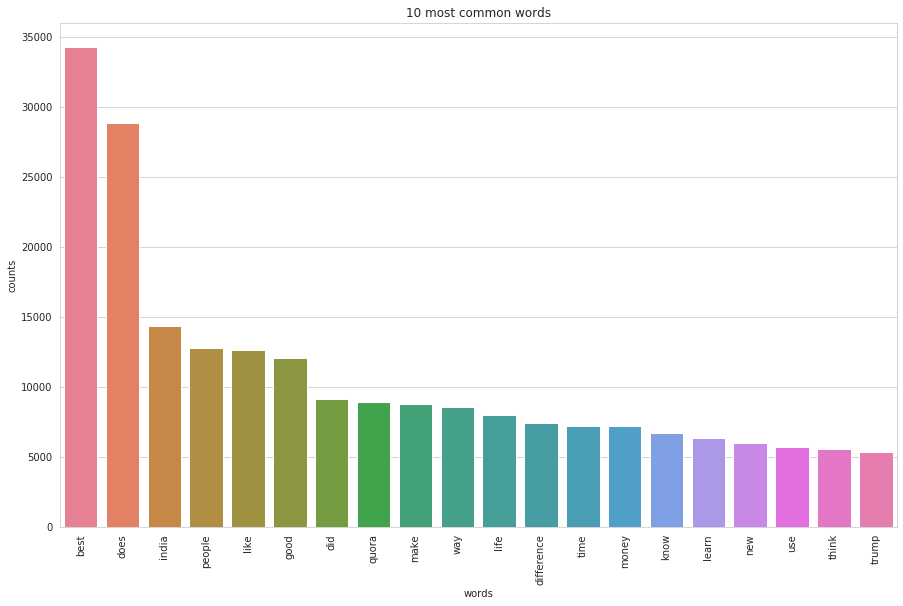

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df2['question1_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
best does way learn english love weight girl improve sex language lose programming movies time long math know make increase

Topic #1:
good like does money year make feel online old people life business women start best earn stop bad men doing

Topic #2:
does did time mean use account facebook insram number iphone phone change know card energy used possible car thing travel

Topic #3:
india people quora trump world think did best 500 notes 1000 donald life 2016 indian war does money president black

Topic #4:
best good india engineering job difference books company prepare like computer study science software exam college companies know interview social


In [0]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
  LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
  with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

In [0]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d95f6702d7635039488af0297a68c86ca24d6978f8502616b34f52a1b06da044
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


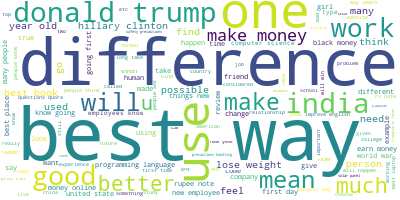

In [0]:
sentences = df2['question1_processed'] + df2['question2_processed']

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(sentences.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()